## Classification With A Tabular Vector Borne Diesease Dataset

In [6]:
# import packages
import numpy as np
import seaborn as sb
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# read files and show basic information of dataset
path_train = '/Users/shuoyang/Documents/GitHub/Classification-with-a-Tabular-Vector-Borne-Disease-Dataset/dataset/train.csv'
path_test = '/Users/shuoyang/Documents/GitHub/Classification-with-a-Tabular-Vector-Borne-Disease-Dataset/dataset/test.csv'

df_train =  pd.DataFrame(pd.read_csv(path_train))
df_test =  pd.DataFrame(pd.read_csv(path_test))

print(df.describe().head(5))
print("Head of dataset: ")
print(df.head())

               id  sudden_fever    headache  mouth_bleed  nose_bleed  \
count  707.000000    707.000000  707.000000   707.000000  707.000000   
mean   353.000000      0.503536    0.449788     0.459689    0.487977   
std    204.237607      0.500341    0.497825     0.498725    0.500209   
min      0.000000      0.000000    0.000000     0.000000    0.000000   
25%    176.500000      0.000000    0.000000     0.000000    0.000000   

       muscle_pain  joint_pain    vomiting        rash    diarrhea  ...  \
count   707.000000  707.000000  707.000000  707.000000  707.000000  ...   
mean      0.517680    0.449788    0.441301    0.487977    0.390382  ...   
std       0.500041    0.497825    0.496894    0.500209    0.488181  ...   
min       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%       0.000000    0.000000    0.000000    0.000000    0.000000  ...   

       lymph_swells  breathing_restriction  toe_inflammation  \
count    707.000000             707.000000        70

11
West_Nile_fever          85
Japanese_encephalitis    81
Tungiasis                70
Rift_Valley_fever        70
Chikungunya              66
Dengue                   63
Yellow_Fever             61
Zika                     58
Plague                   53
Lyme_disease             52
Malaria                  48
Name: prognosis, dtype: int64


<BarContainer object of 11 artists>

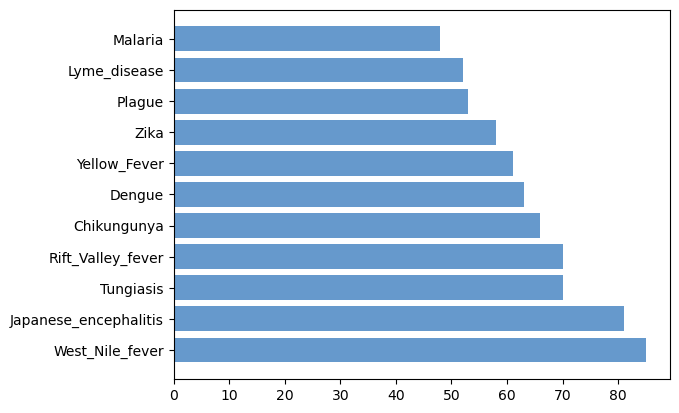

In [24]:
prognosis = df_train['prognosis']
prog_counts = pd.DataFrame(pd.value_counts(prognosis))
index = prog_counts.index
counts = prog_counts['prognosis']
n_class = len(index)
print(n_class)
print(counts)
fig, ax = plt.subplots()
ax.barh(index, counts, color='#6699CC')

In [9]:
train = np.array(df_train)

X_train = train[:, 1:64]
y_train = train[:, -1]

test = np.array(df_test)

X_test = test[:, 1:64]
y_test = test[:, -1]

In [42]:
# classification using logistic regression
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_train, y_train, test_size=0.10, random_state=0)
# creation of logistic regression of multi-classes
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train_lr, y_train_lr)
predict = clf.predict(X_test)
score_test_lr = clf.score(X_test_lr, y_test_lr)
print('Score: ' + str(score_test))

Score: 0.28169014084507044


/Users/shuoyang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X_train, y_train, test_size=0.35, random_state=10)

clf = RandomForestClassifier(max_depth=10, random_state=1)
clf.fit(X_train_rfc, y_train_rfc)
pred_test = clf.predict(X_test)
para = clf.get_params()
score_test_rfc = clf.score(X_test_rfc, y_test_rfc)
print('Score: ' + str(score_test_rfc))

Score: 0.2903225806451613


[0.28169014084507044, 0.2903225806451613]


/var/folders/7s/7lptqyf979q9bx386f7s5vz00000gn/T/ipykernel_35128/796290253.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


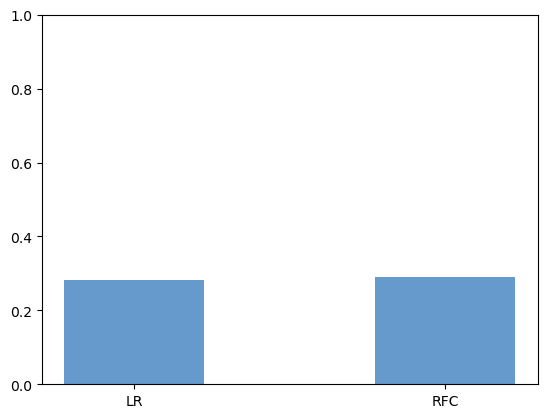

In [54]:
# comparasion of diffeerent methods
scores = [float(score_test_lr), float(score_test_rfc)]
print(scores)
index_score = ['LR', 'RFC']

fig, ax = plt.subplots()
ax.set_ylim(0, 1)
ax.bar(index_score, scores, width=0.45, color='#6699CC')
fig.show()


                        0
Chikungunya            51
Lyme_disease           40
Yellow_Fever           38
West_Nile_fever        38
Rift_Valley_fever      34
Tungiasis              30
Japanese_encephalitis  25
Zika                   20
Plague                 14
Malaria                 8
Dengue                  5


<BarContainer object of 11 artists>

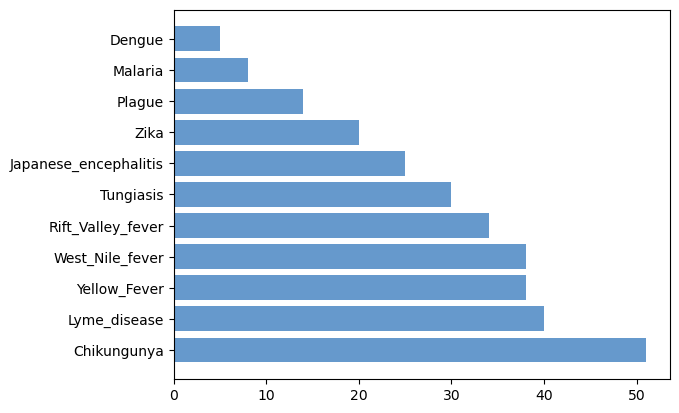

In [66]:
pred_test_df = pd.DataFrame(pd.value_counts(pred_test))
print(pred_test_df)
index_pred_test = pred_test_df.index
values_pred_test = np.array(pred_test_df[0])
fig, ax = plt.subplots()
ax.barh(index_pred_test, values_pred_test, color='#6699CC')